In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
#from jax import grad, jit, random
#import jax.numpy as np
import numpy as np
import torch
from torch.autograd import grad

$$
\mathbb{E}_{p(b|\theta)} \left[ (b - .45)^2 \right]
$$

In [128]:
def logprob(b, theta):
    #return (b - theta)**2
    
    probs = torch.nn.functional.log_softmax(theta)
    b_ohe = torch.zeros_like(probs)
    b_ohe[b] = 1
    return torch.dot(b_ohe, probs)
    #return b*torch.log(theta) + (1 - b)*torch.log(1 - theta)
    

In [129]:
torch.multinomial(torch.tensor([0.5, 0.5]), num_samples=1)[0]

tensor(0)

In [130]:
torch.bernoulli(torch.tensor(0.5))

tensor(1.)

In [165]:
def magic_box(x):
    return torch.exp(x - x.detach())


def objective_reinforce(fun, logprob):
    def f(theta, b):
        #b = torch.bernoulli(theta)
        #bb = magic_box(b)
        return fun(b) * magic_box(logprob(b, theta))
    return f


def fun(b):
    return (b - .1)**2

In [166]:
theta0 = torch.tensor([0.5, 0.5], requires_grad=True)
eta = torch.tensor(0.005, requires_grad=True)

def reinforce(theta0, eta):
    """One step of reinforce gradient estimator
    """
    theta_p = theta0
    for i in range(1000):
        #bs = 0.1 * torch.randn(1) + theta_p
        #bs = torch.bernoulli(theta_p)
        bs = torch.multinomial(theta_p, num_samples=1)[0]
        theta_p = theta_p - eta*grad(objective_reinforce(fun, logprob)(theta_p, bs), theta_p, create_graph=True)[0]
    #loss = fun( 0.1 * torch.randn(1) + theta_p).mean()
    loss = fun( torch.multinomial(theta_p, num_samples=1) ).mean()
    #loss = fun( torch.bernoulli(theta_p) ).mean()
    #losses.append(loss)   
    return loss, theta_p

In [167]:
reinforce(theta0, eta)

<ipython-input-128-28aabe975c0e>:4: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = torch.nn.functional.log_softmax(theta)


(tensor(0.0100), tensor([0.9530, 0.0470], grad_fn=<SubBackward0>))

In [168]:
grad(reinforce(theta0, eta)[0], theta0)[0]

<ipython-input-128-28aabe975c0e>:4: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = torch.nn.functional.log_softmax(theta)


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [95]:
theta0 = torch.tensor(.25, requires_grad=True)
eta = torch.tensor(0.1, requires_grad=True)


thetas = []

for _ in range(1000):

    eta = eta - 0.01*grad(reinforce(theta0, eta), eta)[0]
    thetas.append(eta)
    #print(grad(reinforce(theta0, eta), theta0)[0])


RuntimeError: prob_dist must be 1 or 2 dim

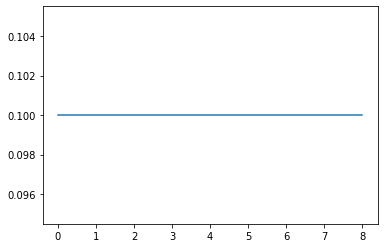

In [61]:


plt.plot(thetas)

## Simple higher order autodiff example

In [170]:
def loss(x):
    return torch.sum(x**2)

def sgd(x0, eta):
    return loss(x0 - eta*grad(loss(x0), x0)[0])

In [171]:
loss(torch.tensor(0.2))

tensor(0.0400)

In [172]:
sgd(torch.tensor(0.2, requires_grad=True), eta=0.01)

tensor(0.0384, grad_fn=<SumBackward0>)

In [173]:
x0 = torch.tensor(0.2, requires_grad=True)
eta = torch.tensor(0.01, requires_grad=True)

grad(sgd(x0, eta), eta)

(tensor(-0.1568),)

In [174]:
grad(sgd(x0, eta), x0)

(tensor(0.3920),)